# Predicting closing stock price of technology companies with artificial neural network: Long Short Term Memomry (LSTM)

In [69]:
# libraries 

import math
import pandas_datareader as DataReader
from pandas_datareader.data import DataReader
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

from datetime import datetime

In [70]:
#df = web.DataReader('AMZN', data_source='yahoo', start='2019-05-01', end='2020-05-01')

In [71]:
# Technology companies selected for analysis
tech_companies = ['AAPL', 'AMZN','GOOG', 'MSFT']


# End and start date to extract
start='2019-05-01'
end='2020-05-01'


# Created a for loop for grabing yahoo finance data and transform to dataframe
for stock in tech_companies:   
    # Set DataFrame as the Stock Ticker
    globals()[stock] = DataReader(stock, 'yahoo', start, end)

In [72]:
company_list = [AAPL, AMZN, GOOG, MSFT]
company_name = ["APPLE", "AMAZON","GOOGLE", "MICROSOFT"]

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name
    
df = pd.concat(company_list, axis=0)
df.head(5)

,High,Low,Open,Close,Volume,Adj Close,company_name
Date,,,,,,,
2019-05-01,215.309998,209.229996,209.880005,210.520004,64827300.0,207.239120,APPLE
2019-05-02,212.649994,208.130005,209.839996,209.149994,31996300.0,205.890457,APPLE
2019-05-03,211.839996,210.229996,210.889999,211.750000,20892400.0,208.449951,APPLE
2019-05-06,208.839996,203.500000,204.289993,208.479996,32443100.0,205.230911,APPLE
2019-05-07,207.419998,200.830002,205.880005,202.860001,38763700.0,199.698502,APPLE


In [74]:
df.tail(5)

,High,Low,Open,Close,Volume,Adj Close,company_name
Date,,,,,,,
2020-04-27,176.899994,173.300003,176.589996,174.050003,33194400.0,173.566605,MICROSOFT
2020-04-28,175.669998,169.389999,175.589996,169.809998,34392700.0,169.338379,MICROSOFT
2020-04-29,177.679993,171.880005,173.220001,177.429993,51286600.0,176.937210,MICROSOFT
2020-04-30,180.399994,176.229996,180.000000,179.210007,53661300.0,178.712280,MICROSOFT
2020-05-01,178.639999,174.009995,175.800003,174.570007,39370500.0,174.085175,MICROSOFT


In [13]:
compression_opts = dict(method='zip',
                        archive_name='stockdf.csv')  
df.to_csv('stockdf.zip', index=False,
           compression=compression_opts)  

In [14]:
# Summary Stats for AAPL
AAPL.describe()

,High,Low,Open,Close,Volume,Adj Close
count,254.000000,254.000000,254.000000,254.000000,2.540000e+02,254.000000
mean,247.339803,241.748308,244.190314,244.753937,3.362484e+07,243.115514
std,43.289529,42.042144,42.524338,42.882001,1.728388e+07,43.297089
min,177.919998,170.270004,175.440002,173.300003,1.136200e+07,171.256134
25%,207.200001,203.549999,205.594997,205.670002,2.186125e+07,203.919884
50%,245.500000,237.860001,242.025002,242.695000,2.845690e+07,241.264725
75%,281.764992,276.857491,277.810013,279.224998,3.849242e+07,277.976295
max,327.850006,323.350006,324.739990,327.200012,1.067212e+08,326.316681


In [15]:
# Summary stats for AMZN
AMZN.describe()

,High,Low,Open,Close,Volume,Adj Close
count,254.000000,254.000000,254.000000,254.000000,2.540000e+02,254.000000
mean,1905.025551,1866.509922,1886.055434,1886.876415,4.145494e+06,1886.876415
std,158.874570,148.953517,153.363749,153.885729,2.092531e+06,153.885729
min,1725.000000,1626.030029,1641.510010,1676.609985,8.813000e+05,1676.609985
25%,1793.822510,1763.152527,1778.487518,1784.252533,2.765525e+06,1784.252533
50%,1871.404968,1828.684998,1843.539978,1855.319946,3.498750e+06,1855.319946
75%,1950.740021,1907.342468,1932.442474,1923.570007,4.950125e+06,1923.570007
max,2475.000000,2396.010010,2443.199951,2474.000000,1.556730e+07,2474.000000


In [16]:
# Summary stats for GOOG
GOOG.describe()

,High,Low,Open,Close,Volume,Adj Close
count,254.000000,254.000000,254.000000,254.000000,2.540000e+02,254.000000
mean,1258.437243,1233.467381,1245.284035,1246.626221,1.684120e+06,1246.626221
std,118.097556,119.698128,118.656532,118.900773,8.133675e+05,118.900773
min,1047.489990,1013.536011,1042.900024,1036.229980,3.475000e+05,1036.229980
25%,1169.737518,1139.445007,1147.567474,1152.634949,1.160450e+06,1152.634949
50%,1239.325012,1213.020020,1224.190002,1222.630005,1.448650e+06,1222.630005
75%,1337.382263,1313.910034,1327.924988,1320.677460,1.936925e+06,1320.677460
max,1532.105957,1521.400024,1525.069946,1526.689941,5.130600e+06,1526.689941


In [17]:
# Summary Stats for MSFT
MSFT.describe()

,High,Low,Open,Close,Volume,Adj Close
count,254.000000,254.000000,254.000000,254.000000,2.540000e+02,254.000000
mean,149.354882,146.101456,147.790866,147.805276,3.177944e+07,146.683554
std,16.448353,15.644166,16.093237,16.116663,1.810319e+07,16.444063
min,123.279999,119.010002,121.279999,119.839996,8.989200e+06,118.383247
25%,137.700001,135.347496,136.820004,136.430000,2.010082e+07,135.084091
50%,144.459999,139.525002,140.979996,141.050003,2.491460e+07,139.720573
75%,160.697498,157.232502,158.665001,158.927505,3.582625e+07,158.138939
max,190.699997,186.470001,190.649994,188.699997,9.707360e+07,187.663330


# Amazon (2,021) and Google (1,361) have had the highest closing amounts 

In [18]:
# General info
AAPL.info()
AMZN.info()
GOOG.info()
MSFT.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 254 entries, 2019-05-01 to 2020-05-01
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   High          254 non-null    float64
 1   Low           254 non-null    float64
 2   Open          254 non-null    float64
 3   Close         254 non-null    float64
 4   Volume        254 non-null    float64
 5   Adj Close     254 non-null    float64
 6   company_name  254 non-null    object 
dtypes: float64(6), object(1)
memory usage: 15.9+ KB
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 254 entries, 2019-05-01 to 2020-05-01
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   High          254 non-null    float64
 1   Low           254 non-null    float64
 2   Open          254 non-null    float64
 3   Close         254 non-null    float64
 4   Volume        254 non-null    int64  
 5   Adj Clos

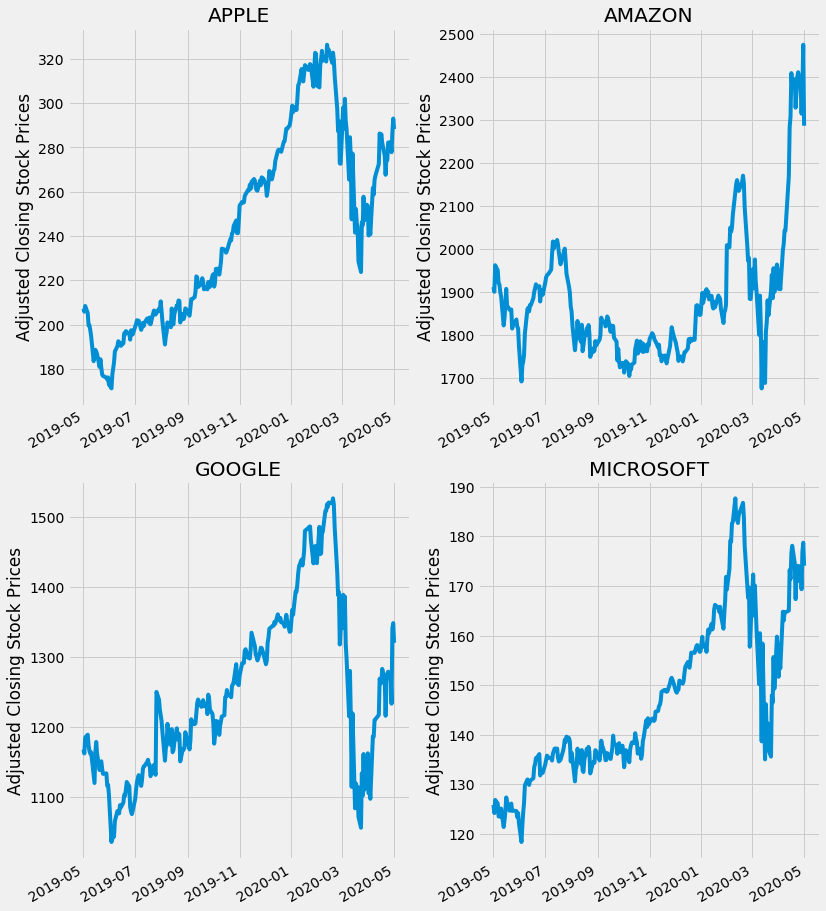

In [19]:
# Visuals to see history of the closing prices

plt.figure(figsize=(12, 11))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Adj Close'].plot()
    plt.ylabel('Adjusted Closing Stock Prices')
    plt.xlabel(None)
    plt.title(f"{company_name[i - 1]}")

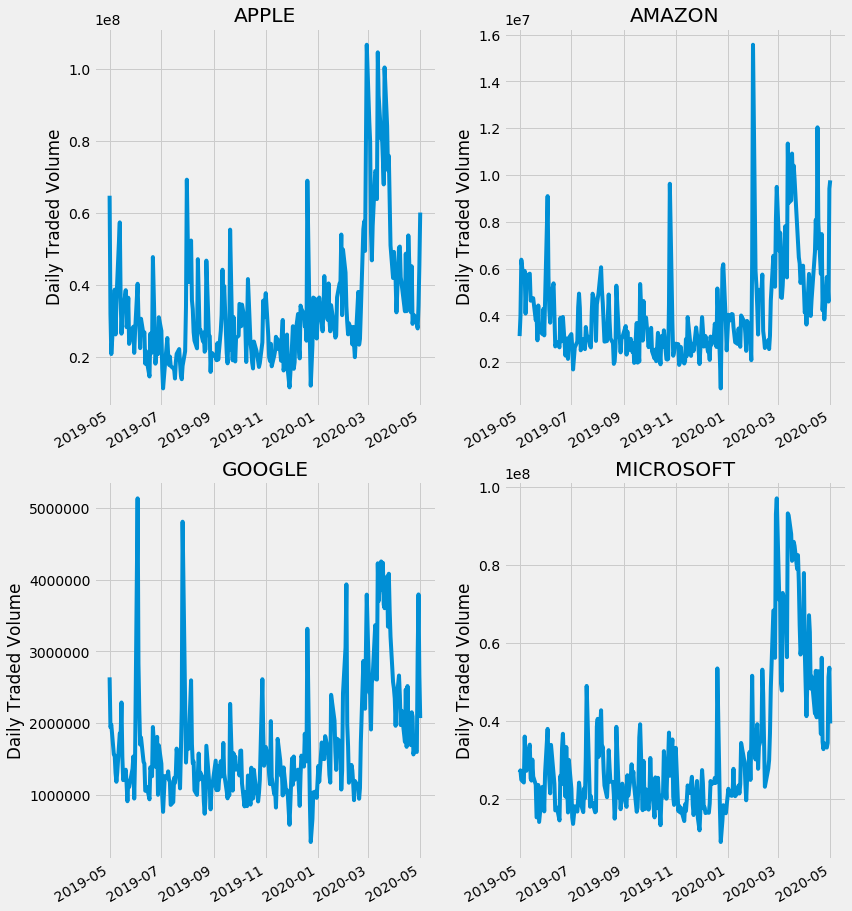

In [20]:
# Total volume of stock traded daily

plt.figure(figsize=(12, 11))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Volume'].plot()
    plt.ylabel('Daily Traded Volume')
    plt.xlabel(None)
    plt.title(f"{company_name[i - 1]}")

company_name
AMAZON       [[AxesSubplot(0.08,0.655;0.378261x0.225), Axes...
APPLE        [[AxesSubplot(0.08,0.655;0.378261x0.225), Axes...
GOOGLE       [[AxesSubplot(0.08,0.655;0.378261x0.225), Axes...
MICROSOFT    [[AxesSubplot(0.08,0.655;0.378261x0.225), Axes...
dtype: object

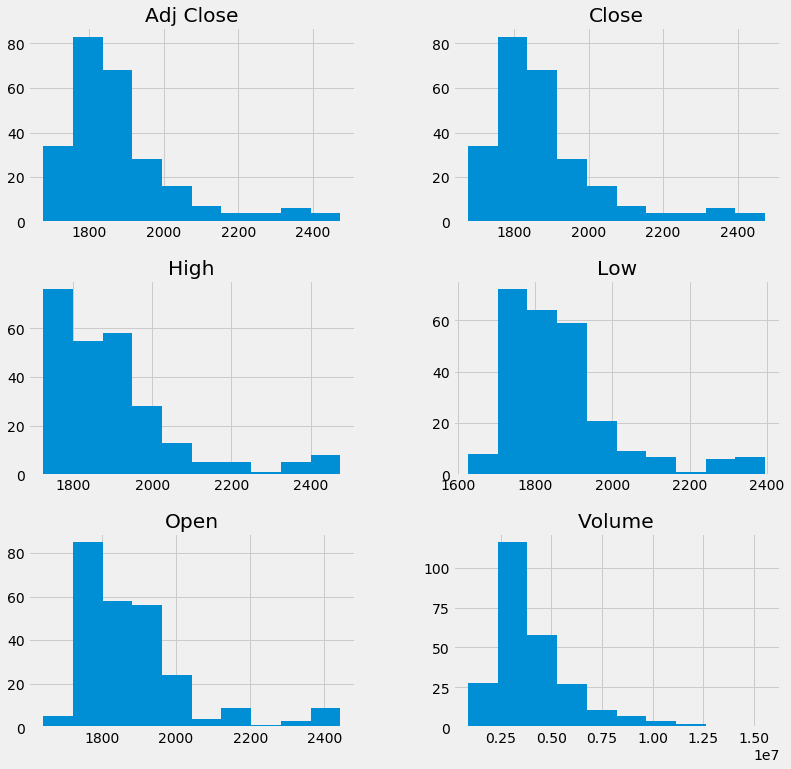

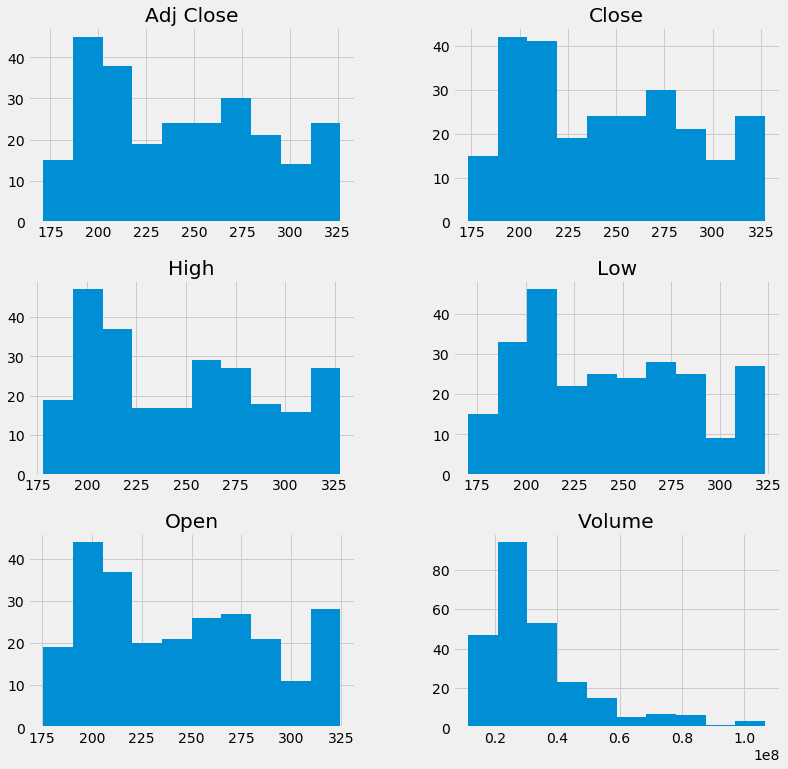

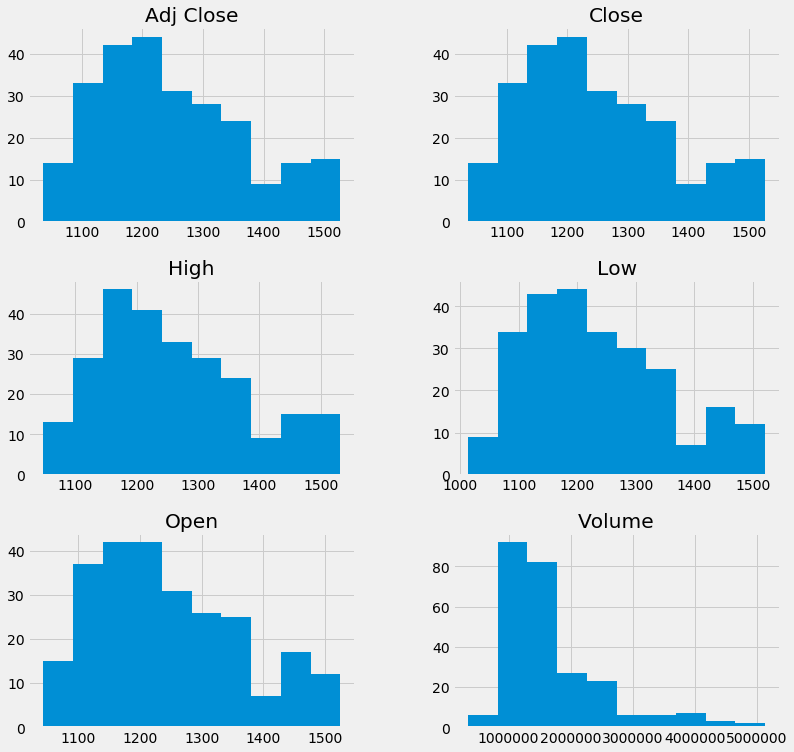

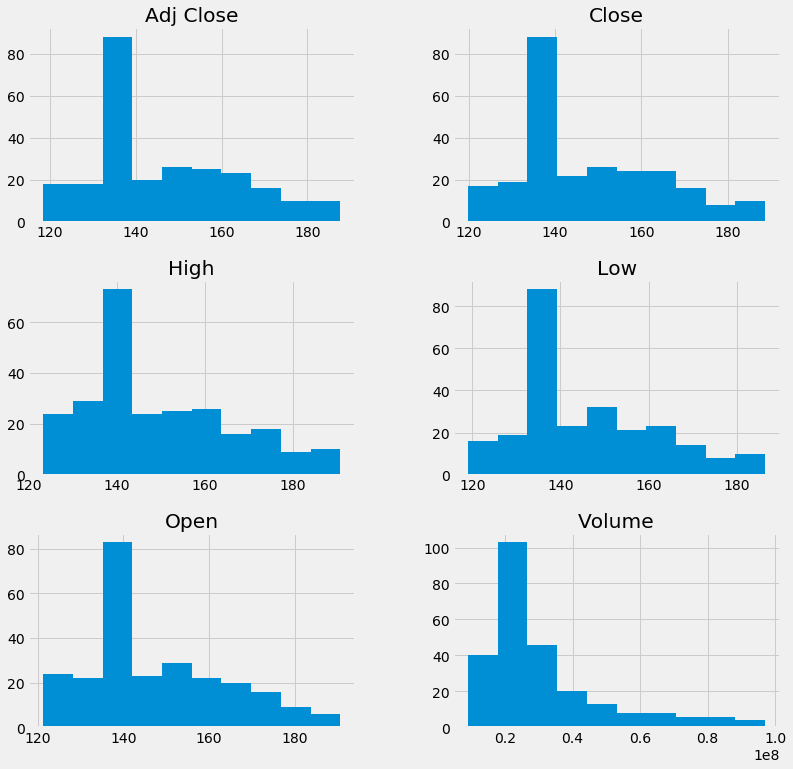

In [21]:
# AMAZON, APPLE, GOOGLE, MICROSOFT 

df.groupby("company_name").hist(figsize=(12, 12))

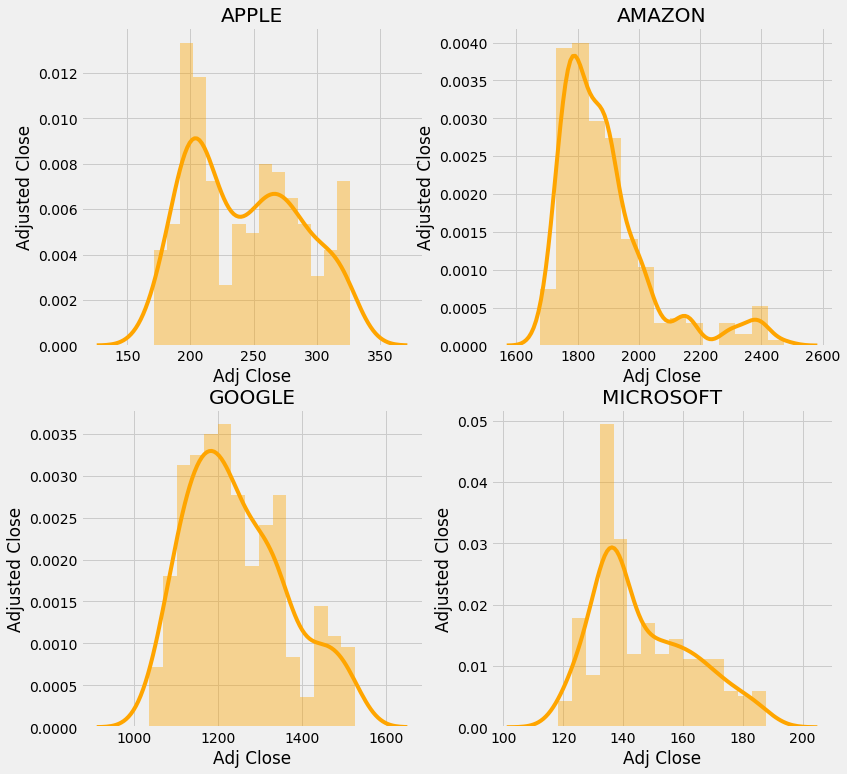

In [22]:
plt.figure(figsize=(12, 12))

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    sns.distplot(company['Adj Close'].dropna(), bins=15, color='orange')
    plt.ylabel('Adjusted Close')
    plt.title(f'{company_name[i - 1]}')

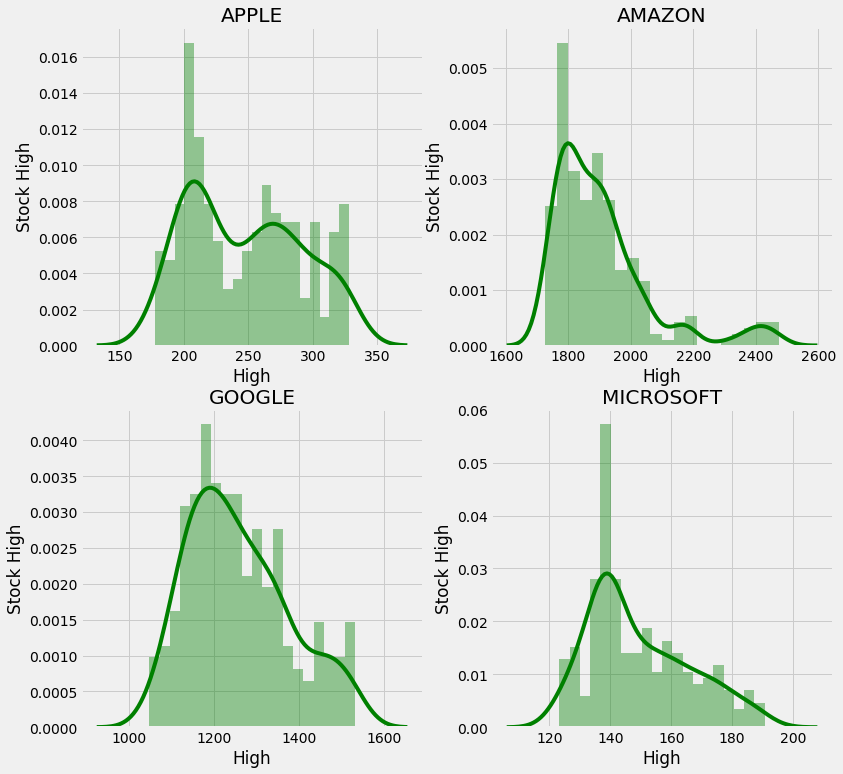

In [23]:
plt.figure(figsize=(12, 12))

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    sns.distplot(company["High"].dropna(), bins=20, color='green')
    plt.ylabel('Stock High')
    plt.title(f'{company_name[i - 1]}')

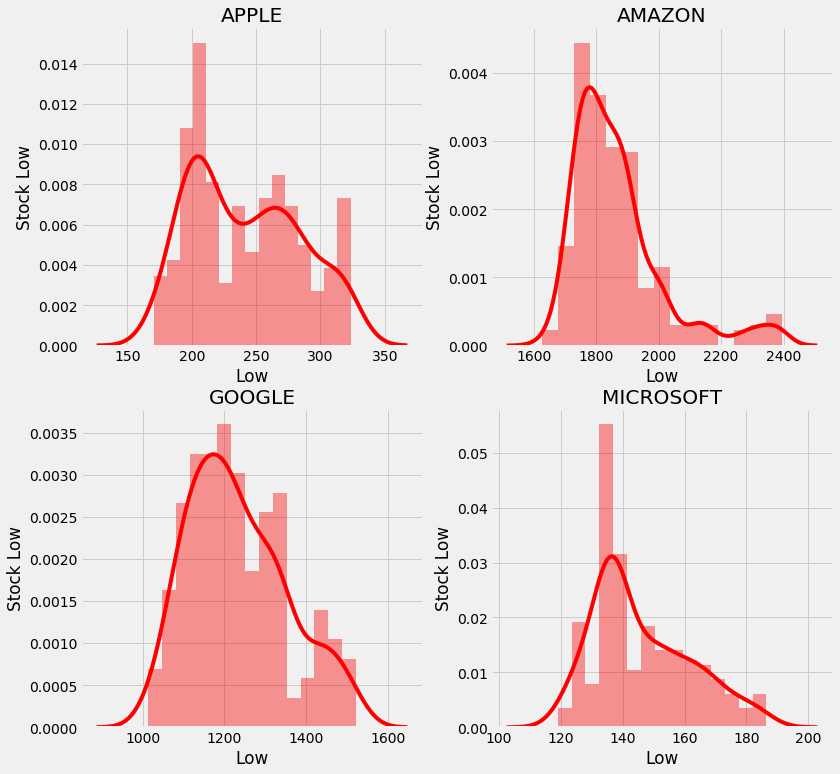

In [24]:
plt.figure(figsize=(12, 12))

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    sns.distplot(company["Low"].dropna(), bins=15, color='red')
    plt.ylabel('Stock Low')
    plt.title(f'{company_name[i - 1]}')

In [25]:
ma_day = [10, 20, 50]

for ma in ma_day:
    for company in company_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company['Adj Close'].rolling(ma).mean()

In [26]:
print(GOOG.columns)

Index(['High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close', 'company_name',
       'MA for 10 days', 'MA for 20 days', 'MA for 50 days'],
      dtype='object')


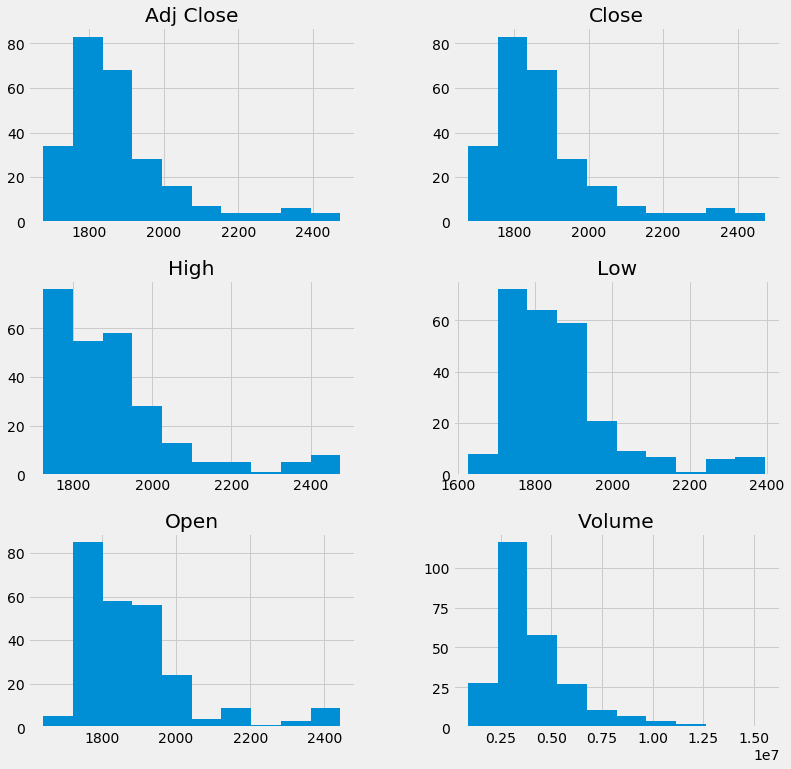

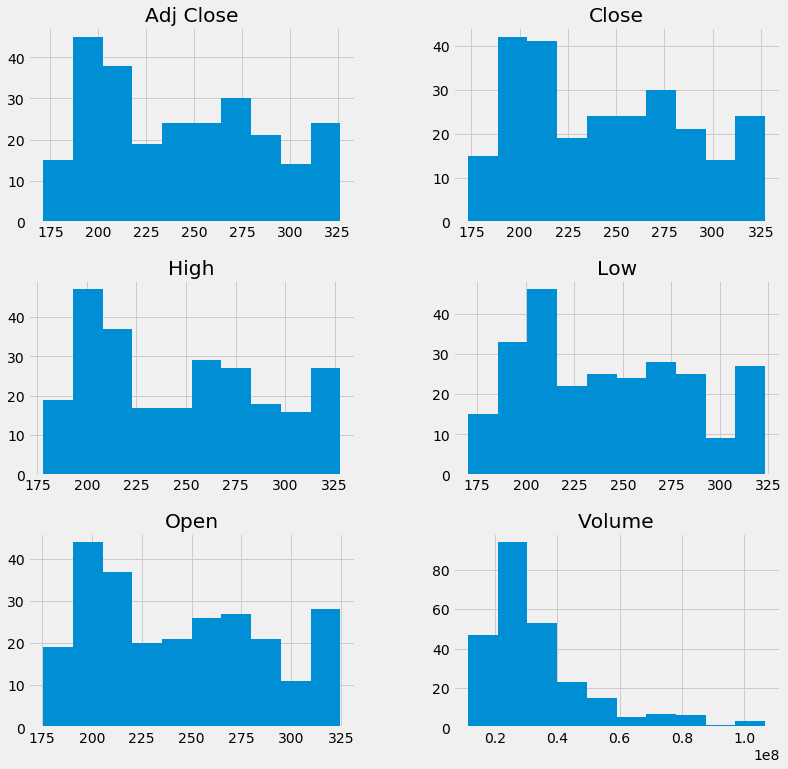

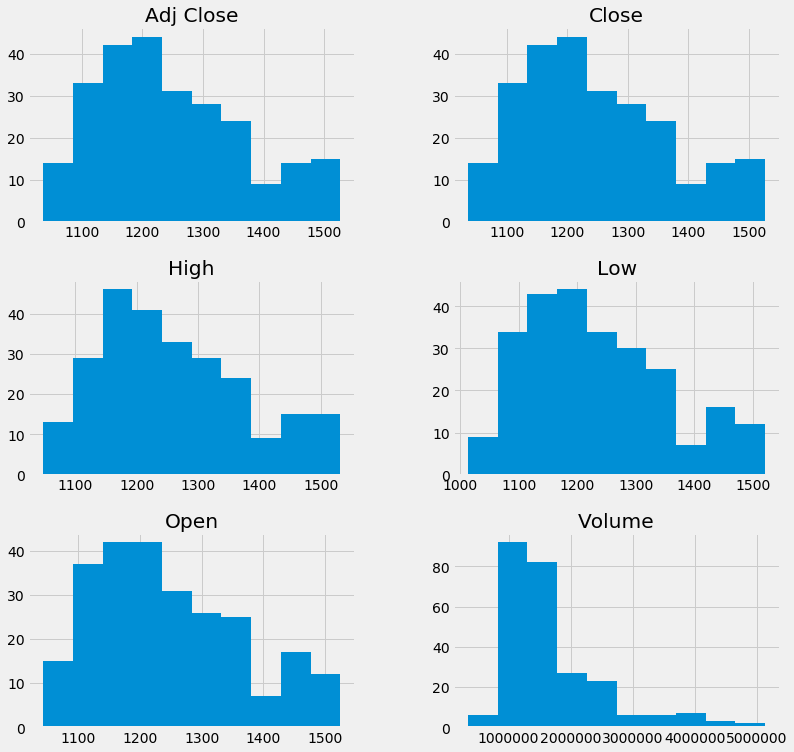

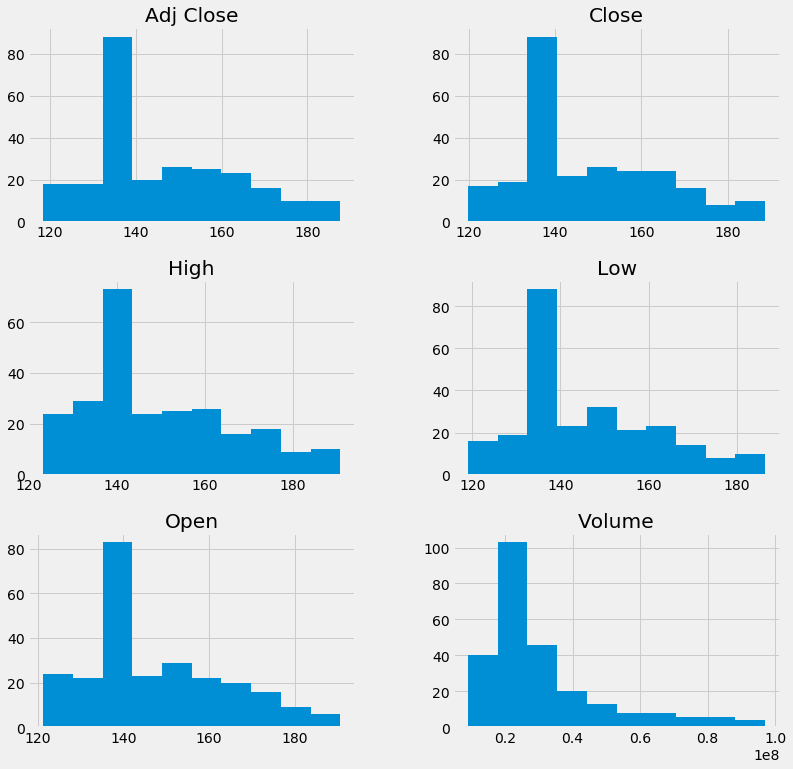

In [27]:
df.groupby("company_name").hist(figsize=(12, 12));

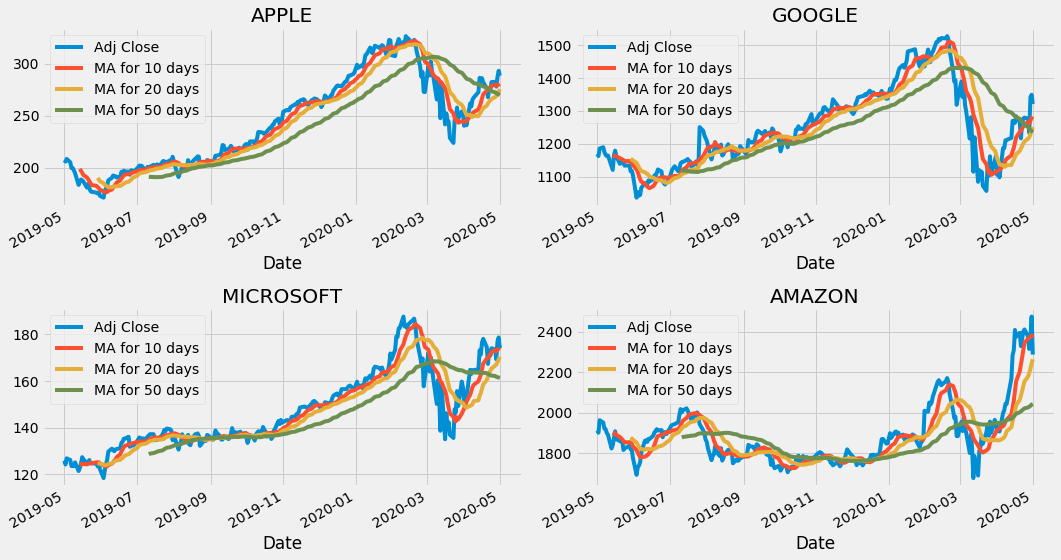

In [65]:


fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(8)
fig.set_figwidth(15)


AAPL[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,0])
axes[0,0].set_title('APPLE')


AMZN[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,1])
axes[1,1].set_title('AMAZON')


GOOG[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,1])
axes[0,1].set_title('GOOGLE')


MSFT[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,0])
axes[1,0].set_title('MICROSOFT')


fig.tight_layout()

In [29]:
# Predicting close stock prices for Amazon given their adj closing 

# Stock quote
df = DataReader('AMZN', data_source='yahoo', start='2012-05-01', end=datetime.now())

df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-05-01,232.970001,228.399994,229.399994,230.039993,6754900,230.039993
2012-05-02,231.440002,227.399994,227.820007,230.250000,4593400,230.250000
2012-05-03,232.529999,228.029999,229.740005,229.449997,4055500,229.449997
2012-05-04,229.720001,223.740005,227.800003,223.990005,4585200,223.990005
2012-05-07,226.869995,222.289993,222.360001,225.160004,3314300,225.160004
...,...,...,...,...,...,...
2020-05-22,2469.850098,2430.129883,2455.010010,2436.879883,2867100,2436.879883
2020-05-26,2462.000000,2414.060059,2458.000000,2421.860107,3568200,2421.860107
2020-05-27,2413.580078,2330.000000,2404.989990,2410.389893,5056900,2410.389893


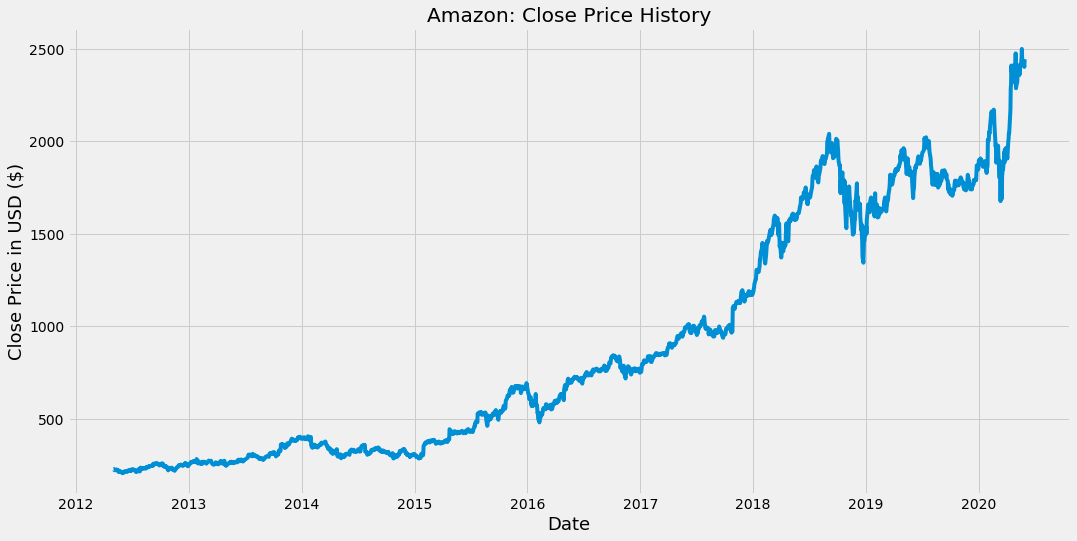

In [30]:
plt.figure(figsize=(16,8))
plt.title('Amazon: Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price in USD ($)', fontsize=18)
plt.show()

In [31]:
# New dataframe with only the 'Close' column
data = df.filter(['Close'])
#Convert the dataframe to a numpy array
dataset = data.values
#Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .8 ))

training_data_len

1627

In [32]:
#Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.00952955],
       [0.00962126],
       [0.00927187],
       ...,
       [0.96176386],
       [0.95770669],
       [0.97573073]])

In [33]:
#Create the training data set
#Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
#Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()

[array([0.00952955, 0.00962126, 0.00927187, 0.00688731, 0.00739829,
       0.006848  , 0.0064462 , 0.00806649, 0.00849885, 0.00642436,
       0.007062  , 0.00691788, 0.00442849, 0.00245882, 0.00431931,
       0.00310518, 0.00395681, 0.00306588, 0.00203955, 0.00285188,
       0.0004411 , 0.00204829, 0.        , 0.00277327, 0.00217931,
       0.00411404, 0.00462065, 0.00448089, 0.00361616, 0.00358122,
       0.00284314, 0.00272085, 0.00442412, 0.00630645, 0.00690477,
       0.00646367, 0.00539368, 0.00608808, 0.00517531, 0.00759482,
       0.00759918, 0.00571685, 0.00879147, 0.0092151 , 0.00930681,
       0.00822808, 0.00735024, 0.00735024, 0.00492637, 0.00443285,
       0.00311829, 0.00444159, 0.00340216, 0.00380395, 0.0040398 ,
       0.00783939, 0.00876526, 0.00776951, 0.0064724 , 0.00385637])]
[0.005149098402478611]

[array([0.00952955, 0.00962126, 0.00927187, 0.00688731, 0.00739829,
       0.006848  , 0.0064462 , 0.00806649, 0.00849885, 0.00642436,
       0.007062  , 0.00691788, 0.0

In [34]:
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

In [35]:
#Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(1567, 60, 1)

In [36]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

#Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences= False))
model.add(Dense(25))
model.add(Dense(1))

In [37]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [38]:
#Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

Epoch 1/1
1567/1567 [==============================] - 213s 136ms/step - loss: 0.0011


In [39]:
#Create the testing data set
#Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 60: , :]
#Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

In [40]:
# Convert the data to a numpy array
x_test = np.array(x_test)

In [41]:
# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

In [42]:
# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [43]:
RMSE = np.sqrt( np.mean(predictions - y_test)**2)
RMSE

23.29402769492765

/Users/marleneaviles/opt/anaconda3/envs/NewPython/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


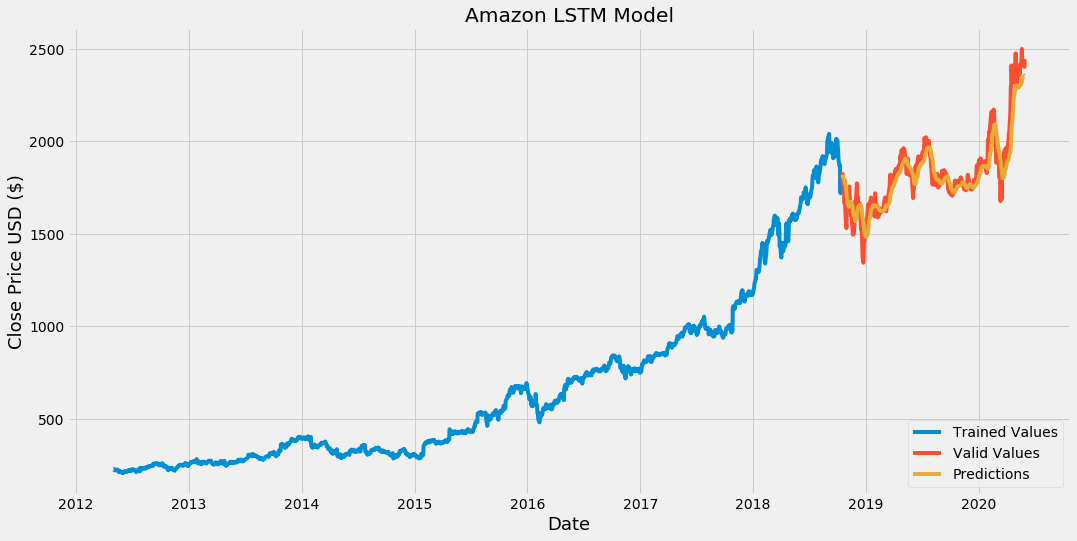

In [66]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,8))
plt.title('Amazon LSTM Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Trained Values', 'Valid Values', 'Predictions'], loc='lower right')
plt.show()

In [45]:
#Show the valid and predicted prices
valid

,Close,Predictions
Date,,
2018-10-17,1831.729980,1819.827759
2018-10-18,1770.719971,1812.754761
2018-10-19,1764.030029,1804.889282
2018-10-22,1789.300049,1796.824951
2018-10-23,1768.699951,1791.063965
...,...,...
2020-05-22,2436.879883,2342.417725
2020-05-26,2421.860107,2349.293213
2020-05-27,2410.389893,2353.166016


# ARIMA MODEL 

In [46]:
# Stock quote
df = DataReader('AMZN', data_source='yahoo', start='2012-05-01', end=datetime.now())

df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-05-01,232.970001,228.399994,229.399994,230.039993,6754900,230.039993
2012-05-02,231.440002,227.399994,227.820007,230.250000,4593400,230.250000
2012-05-03,232.529999,228.029999,229.740005,229.449997,4055500,229.449997
2012-05-04,229.720001,223.740005,227.800003,223.990005,4585200,223.990005
2012-05-07,226.869995,222.289993,222.360001,225.160004,3314300,225.160004
...,...,...,...,...,...,...
2020-05-22,2469.850098,2430.129883,2455.010010,2436.879883,2867100,2436.879883
2020-05-26,2462.000000,2414.060059,2458.000000,2421.860107,3568200,2421.860107
2020-05-27,2413.580078,2330.000000,2404.989990,2410.389893,5056900,2410.389893


In [47]:
conda install -c anaconda pyramid

Solving environment: done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [48]:
import pyramid
from pmdarima import auto_arima

In [56]:

data = df.sort_index(ascending=True, axis=0)

train = data[:1627]
valid = data[1627:]

training = train['Close']
validation = valid['Close']

model = auto_arima(training, start_p=1, start_q=2,max_p=4, max_q=4, m=12,start_P=0, seasonal=True,d=1, D=1, trace=True,error_action='ignore',suppress_warnings=True)
model.fit(training)

forecast = model.predict(n_periods=406)
forecast = pd.DataFrame(forecast,index = valid.index,columns=['Prediction'])


Performing stepwise search to minimize aic
Fit ARIMA(1,1,2)x(0,1,1,12) [intercept=True]; AIC=12951.884, BIC=12984.203, Time=6.002 seconds
Fit ARIMA(0,1,0)x(0,1,0,12) [intercept=True]; AIC=13999.750, BIC=14010.523, Time=0.104 seconds
Fit ARIMA(1,1,0)x(1,1,0,12) [intercept=True]; AIC=13567.784, BIC=13589.330, Time=1.898 seconds
Fit ARIMA(0,1,1)x(0,1,1,12) [intercept=True]; AIC=12949.755, BIC=12971.301, Time=2.444 seconds
Near non-invertible roots for order (0, 1, 1)(0, 1, 1, 12); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
Fit ARIMA(0,1,0)x(0,1,0,12) [intercept=False]; AIC=13997.804, BIC=14003.190, Time=0.061 seconds
Fit ARIMA(1,1,2)x(0,1,0,12) [intercept=True]; AIC=14002.803, BIC=14029.736, Time=1.799 seconds
Fit ARIMA(1,1,2)x(1,1,1,12) [intercept=True]; AIC=12950.719, BIC=12988.425, Time=6.951 seconds
Near non-invertible roots for order (1, 1, 2)(1, 1, 1, 12); setting score to inf (at least one inverse root too close to the border 

In [57]:
# very high RMS means not accurate model 

rms=np.sqrt(np.mean(np.power((np.array(valid['Close'])-np.array(forecast['Prediction'])),2)))
rms

531.4755113172183

NameError: name 'legend' is not defined

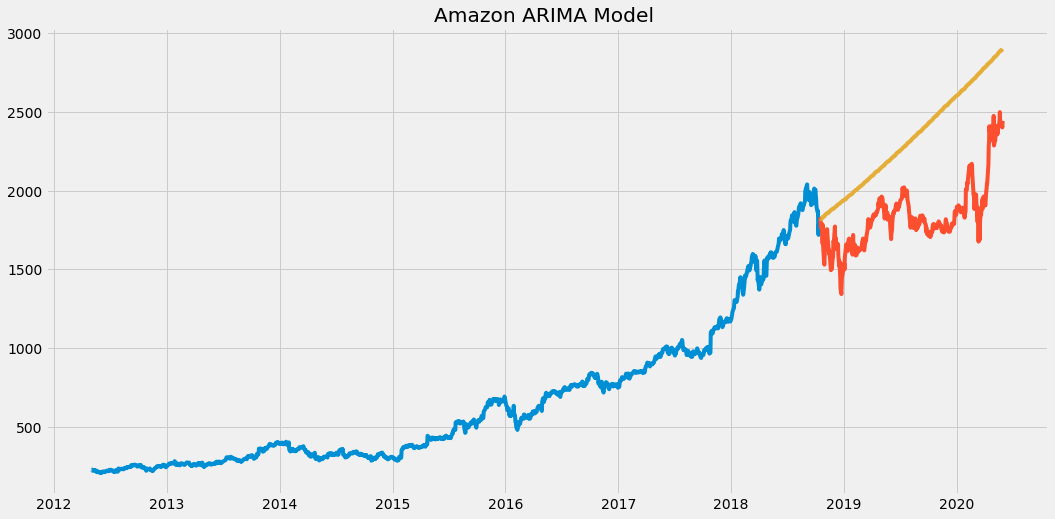

In [51]:
# Plot the data
#train = data[:training_data_len]
#valid = data[training_data_len:]
#valid['Predictions'] = predictions


#plot
plt.figure(figsize=(16,8))
plt.title('Amazon ARIMA Model ')
plt.plot(train['Close'])
plt.plot(valid['Close'])
plt.plot(forecast['Prediction'])

#plt.legend(['Trained Values', 'Valid Values', 'Predictions'], loc='lower right')